<a href="https://colab.research.google.com/github/CNIU1997/BA_888/blob/master/BA888_FE_Kiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## upload files and import library
from google.colab import files
#uploaded = files.upload()

import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

 **Import Dataset**

In [232]:
train = pd.read_csv('train_data.csv',index_col=0)
test = pd.read_csv('test_data.csv',index_col=0)

## clean train
train = train[train.Sector != 'X1']
train = train[train.Sector != 'TRUE']

# ##to test stability-- randomly select 99% of the train data
# train = train.sample(frac=0.99)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,224,225,226) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, comp

In [0]:
train = pd.get_dummies(train, columns=['Sector'])
test = pd.get_dummies(test, columns=['Sector'])

###Version 1: mearge train test

In [0]:
df = pd.concat([train, test], join="outer") 

df = df.iloc[:-2].drop(['X1','PRICE_VAR','year'],axis=1)
cols = df.select_dtypes(exclude=['float']).columns
df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')


for col in df: 
     df[col] = winsorize(df[col], limits=[0.05,0.05])


X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [235]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1.0    0.548414
0.0    0.451586
Name: Class, dtype: float64
1.0    0.560136
0.0    0.439864
Name: Class, dtype: float64


Version 2: use train and test

In [0]:
# X_train = train.iloc[:-2].drop(['X1','PRICE_VAR','year','Class'],axis=1)
# X_test = test.iloc[:-2].drop(['X1','PRICE_VAR','year','Class'],axis=1)
# cols = X_train.select_dtypes(exclude=['float']).columns
# cols2 = X_test.select_dtypes(exclude=['float']).columns
# X_train[cols] = X_train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
# X_test[cols2] = X_test[cols2].apply(pd.to_numeric, downcast='float', errors='coerce')

# y_train = train.iloc[:-2][['Class']]
# y_test = test.iloc[:-2][['Class']]

# y_train['Class'] =y_train['Class'].apply(pd.to_numeric, downcast='float', errors='coerce')

# X_train.fillna(0, inplace=True)
# X_test.fillna(0, inplace=True)

# ##check na in y
# y_train[pd.isnull(y_train).any(axis=1)]
# # y_train.dropna(inplace = True)
# # X_train.drop(y_train.index[[7929,12727,12728]],inplace=True)

In [237]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (17660, 232)
Training Labels Shape: (17660,)
Testing Features Shape: (4415, 232)
Testing Labels Shape: (4415,)




---



**Outliers and Standardization**

In [0]:
# from scipy.stats.mstats import winsorize
# from scipy import stats
# ## remove outliers 5% higher than the max and 5% lower than the min using for loop and winsorize
# for col in X_train: 
#      X_train[col] = winsorize(X_train[col], limits=[0.05,0.05])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # calculate mean and standard deviation of train set
scaler.fit(X_train)


scaler2 = StandardScaler() # calculate mean and standard deviation of test set
scaler2.fit(X_test)


X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler2.transform(X_test) 

**Check for balance**

In [240]:
# y_train['Class'].value_counts(normalize=True)
y_train.value_counts(normalize=True)

1.0    0.548414
0.0    0.451586
Name: Class, dtype: float64



---



**Feature Importance - Random Forest**

In [241]:
#check
np.any(np.isnan(y_train))

False

In [0]:
# #Import Random Forest Model
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

# y_pred=clf.predict(X_test)

In [0]:
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

In [0]:
# feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# feature_imp
# feature_imp[:20]


In [0]:
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**Test for Stability**

In [0]:
# features = pd.DataFrame()
# i = 1
# while i < 5:
#   train = pd.read_csv('train_data.csv',index_col=0)
#   test = pd.read_csv('test_data.csv',index_col=0)
#   train = train[train.Sector != 'X1']
#   train = train[train.Sector != 'TRUE']
#   train = train.sample(frac=0.99)
#   train = pd.get_dummies(train, columns=['Sector'])
#   test = pd.get_dummies(test, columns=['Sector'])
#   X_train = train.iloc[:-2].drop(['X1','PRICE_VAR','year','Class'],axis=1)
#   X_test = test.iloc[:-2].drop(['X1','PRICE_VAR','year','Class'],axis=1)
#   cols = X_train.select_dtypes(exclude=['float']).columns
#   cols2 = X_test.select_dtypes(exclude=['float']).columns
#   X_train[cols] = X_train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
#   X_test[cols2] = X_test[cols2].apply(pd.to_numeric, downcast='float', errors='coerce')
#   y_train = train.iloc[:-2][['Class']]
#   y_test = test.iloc[:-2][['Class']]
#   y_train['Class'] =y_train['Class'].apply(pd.to_numeric, downcast='float', errors='coerce')
#   X_train.fillna(0, inplace=True)
#   X_test.fillna(0, inplace=True)
#   for col in X_train: 
#      X_train[col] = winsorize(X_train[col], limits=[0.05,0.05])
#   #Create a Gaussian Classifier
#   clf=RandomForestClassifier(n_estimators=100)
#   #Train the model using the training sets y_pred=clf.predict(X_test)
#   clf.fit(X_train,y_train)
#   y_pred=clf.predict(X_test)
#   feature_imp = pd.DataFrame( clf.feature_importances_,index=X_train.columns).sort_values( by = 0, ascending=False)
#   features =  pd.concat([features, feature_imp], axis=1)
#   i = i + 1

In [0]:
from sklearn.preprocessing import StandardScaler
features = pd.DataFrame()
i = 1
while i < 31:
  X_train_fe, X_valid, y_train_fe, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=0)
  # calculate mean and standard deviation of train set
  X_train_fe = StandardScaler().fit(X_train_fe).transform(X_train_fe) 
  X_valid = StandardScaler().fit(X_valid).transform(X_valid)  
  #Create a Gaussian Classifier
  clf=RandomForestClassifier(n_estimators=100)
  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train_fe,y_train_fe)
  y_pred=clf.predict(X_valid)
  feature_imp = pd.DataFrame( clf.feature_importances_,index=X_train.columns).sort_values( by = 0, ascending=False)
  features =  pd.concat([features, feature_imp], axis=1)
  i = i + 1

In [246]:
# print(features[0].index)
# print(features[1].index)
# print(features[2].index)
features

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EPS_Diluted,0.008151,0.008132,0.007927,0.007162,0.007257,0.008188,0.006826,0.007722,0.008203,0.006844,0.007430,0.007603,0.006612,0.007635,0.008057,0.006941,0.007253,0.007662,0.007161,0.007374,0.007688,0.007162,0.008502,0.006569,0.007790,0.006632,0.007620,0.007610,0.007159,0.007294
Book_Value_per_Share_Growth,0.007433,0.007166,0.007700,0.007246,0.007226,0.007219,0.007007,0.007331,0.007515,0.006926,0.006998,0.007369,0.007245,0.007264,0.006955,0.007639,0.006746,0.006657,0.007793,0.006905,0.007091,0.007820,0.007041,0.007023,0.006559,0.007266,0.007384,0.007342,0.006928,0.007146
Effect_of_forex_changes_on_cash,0.007351,0.007338,0.007630,0.007649,0.007509,0.007734,0.007753,0.007525,0.007536,0.007819,0.007946,0.007780,0.007450,0.007361,0.007223,0.007832,0.007823,0.007008,0.007369,0.007294,0.007667,0.007361,0.007519,0.007813,0.007313,0.007667,0.006980,0.007846,0.007403,0.007586
EPS,0.007347,0.007708,0.007959,0.007490,0.007017,0.006809,0.007416,0.007908,0.007102,0.007769,0.007157,0.007777,0.006967,0.008221,0.007896,0.008149,0.007249,0.007462,0.007466,0.007217,0.007787,0.007691,0.007572,0.007411,0.007192,0.006947,0.006965,0.007595,0.007306,0.007510
Earnings_Yield,0.007341,0.006788,0.009157,0.006798,0.007388,0.008264,0.007411,0.007409,0.007555,0.007098,0.007388,0.006022,0.006934,0.007426,0.007059,0.007763,0.008229,0.007767,0.006954,0.007986,0.007473,0.008507,0.006441,0.007582,0.008073,0.007521,0.007460,0.006579,0.007572,0.007215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
operatingCycle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cashConversionCycle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sector_Communication Services,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sector_Consumer Defensive,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
# Initialize an empty array to hold feature importances
features_imp = features.mean(axis=1)

In [248]:
features_imp.sort_values(ascending=False)[:20]

Effect_of_forex_changes_on_cash           0.007536
EPS_Diluted                               0.007472
EPS                                       0.007469
Earnings_Yield                            0.007439
Book_Value_per_Share_Growth               0.007198
Net_cash_flow_/_Change_in_cash            0.007018
Weighted_Average_Shs_Out                  0.006890
Financing_Cash_Flow                       0.006863
Gross_Profit_Growth                       0.006810
Revenue_Growth                            0.006789
Operating_Cash_Flow_growth                0.006704
Net_Income_per_Share                      0.006669
Weighted_Average_Shares_Diluted_Growth    0.006624
Asset_Growth                              0.006593
SG&A_Expenses_Growth                      0.006402
Receivables_growth                        0.006324
Weighted_Average_Shs_Out_(Dil)            0.006303
Weighted_Average_Shares_Growth            0.006272
Retained_earnings_(deficit)               0.006269
Cash_and_cash_equivalents      

No handles with labels found to put in legend.


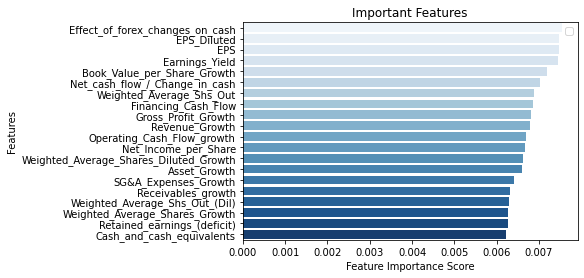

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=features_imp.sort_values(ascending=False)[:20], y=features_imp.sort_values(ascending=False)[:20].index,palette = 'Blues')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
# plt.savefig('FE_Plot_RandomForest.png',dpi=300,bbox_inches="tight")
plt.show()


In [278]:
# features['cumulative_importance'] = 

features_cum_plot = np.cumsum(features_imp)
features_cum_plot = pd.DataFrame(features_cum_plot)
features_cum_plot

,0
EPS_Diluted,0.007472
Book_Value_per_Share_Growth,0.014670
Effect_of_forex_changes_on_cash,0.022206
EPS,0.029675
Earnings_Yield,0.037114
...,...
operatingCycle,1.000000
cashConversionCycle,1.000000
Sector_Communication Services,1.000000
Sector_Consumer Defensive,1.000000


In [291]:
# 51 features required for 0.90 of cumulative importance
len(features_cum_plot[(features_cum_plot > 0.90).all(1)])


51

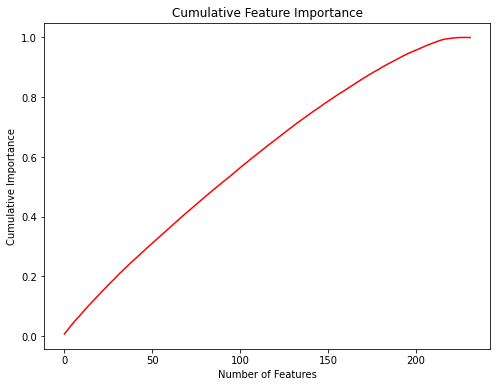

In [302]:
# Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(features_cum_plot))), features_cum_plot, 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    # plt.savefig('FE__cum_importance_RandomForest.jpg',dpi=300,bbox_inches="tight");
    plt.show();

    

In [304]:
features_imp.sort_values(ascending=False)[:20].index

Index(['Effect_of_forex_changes_on_cash', 'EPS_Diluted', 'EPS',
       'Earnings_Yield', 'Book_Value_per_Share_Growth',
       'Net_cash_flow_/_Change_in_cash', 'Weighted_Average_Shs_Out',
       'Financing_Cash_Flow', 'Gross_Profit_Growth', 'Revenue_Growth',
       'Operating_Cash_Flow_growth', 'Net_Income_per_Share',
       'Weighted_Average_Shares_Diluted_Growth', 'Asset_Growth',
       'SG&A_Expenses_Growth', 'Receivables_growth',
       'Weighted_Average_Shs_Out_(Dil)', 'Weighted_Average_Shares_Growth',
       'Retained_earnings_(deficit)', 'Cash_and_cash_equivalents'],
      dtype='object')

In [305]:
features_imp.sort_values(ascending=False)[:51].index

Index(['Effect_of_forex_changes_on_cash', 'EPS_Diluted', 'EPS',
       'Earnings_Yield', 'Book_Value_per_Share_Growth',
       'Net_cash_flow_/_Change_in_cash', 'Weighted_Average_Shs_Out',
       'Financing_Cash_Flow', 'Gross_Profit_Growth', 'Revenue_Growth',
       'Operating_Cash_Flow_growth', 'Net_Income_per_Share',
       'Weighted_Average_Shares_Diluted_Growth', 'Asset_Growth',
       'SG&A_Expenses_Growth', 'Receivables_growth',
       'Weighted_Average_Shs_Out_(Dil)', 'Weighted_Average_Shares_Growth',
       'Retained_earnings_(deficit)', 'Cash_and_cash_equivalents',
       'Operating_Income_Growth', 'EPS_Diluted_Growth',
       'Earnings_Before_Tax_Margin', 'EPS_Growth', 'Free_Cash_Flow_growth',
       'Issuance_(buybacks)_of_shares', 'Net_Income_Com', 'Net_Income',
       'Total_assets', 'Investing_Cash_flow', 'Earnings_before_Tax',
       'Operating_Cash_Flow', 'Consolidated_Income', 'EBIT',
       'Net_Income_Growth', 'Operating_Income', 'SG&A_Expense',
       'Other_Liabili

**Save df**

In [0]:
selected_features = features_imp.sort_values(ascending=False)[:20].index
train_20 = X_train[selected_features]
test_20 = X_test[selected_features]

In [0]:
selected_features = features_imp.sort_values(ascending=False)[:51].index
train_51 = X_train[selected_features]
test_51 = X_test[selected_features]

In [0]:
train_20.to_csv("train_20.csv")
test_20.to_csv("test_20.csv")

train_51.to_csv("train_51.csv")
test_51.to_csv("test_51.csv")

In [0]:
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

In [0]:
# sns.heatmap(X_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
# fig=plt.gcf()
# fig.set_size_inches(10,8)
# plt.show()

In [0]:
#sns.pairplot(X, hue="Class")